## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np



import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [2]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    for n in range(nt-1):
        un=u.copy()
    for i in range(nx-1):
        u[i] = un[i] + nu * dt/dx**2 *(un[i+1] - 2*un[i] + un[i-1]) 
    return 0

## Numba accelerator

In [3]:
#add the numba decorator to accelerate code
from numba import njit
@njit
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    for n in range(nt-1):
        un=u.copy()
    for i in range(nx-1):
        u[i] = un[i] + nu * dt/dx**2 *(un[i+1] - 2*un[i] + un[i-1]) 
    return 0

## Pyccel accelerator

In [4]:
#add the pyccel decorator to accelerate code
@types('float[:]', 'float[:]', 'int', 'int', 'float','float', 'float')
#u :'float[:]', un :'float[:]', nt :'int', nx : 'int', dt : 'float', dx :'float', nu :'float'
def solve_1d_diff_pyccel(u , un , nt , nx , dt , dx , nu ):
    for n in range(nt-1):
        un=u.copy()
    for i in range(nx-1):
        u[i] = un[i] + nu * dt/dx**2 *(un[i+1] - 2*un[i] + un[i-1]) 
    #fill the update of u
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Diffusion')

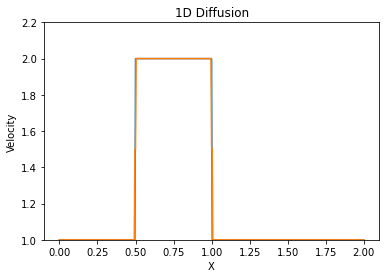

In [5]:
nx = 501
dx = 2 / (nx - 1)
nt = 1500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 

## Call Funtions

### Pure function

In [6]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

1.01 ms ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Function with numba accelerator

In [7]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

260 µs ± 7.29 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [8]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)


ERROR at annotation (semantic) stage
pyccel:
 |fatal [semantic]: mod_3sralsi7vtey_3sralsi7vtey.py [5,11]| Attribute copy not found



PyccelSemanticError: Semantic step failed

In [9]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

NameError: name 'solve_1d_diff_f90' is not defined